In [1]:
import numpy as np
import matplotlib.pyplot as plt
from harmonic_poly import basis_upto_order

In [2]:
# this is a helper function to get the total number of basis functions (upto order l)
def get_no_of_poly(l):
    sum = 0
    sum_arry = [sum]
    for i in range(l+1):
        sum += 2*(i+1) + 1
        sum_arry.append(sum)
    return sum_arry[-1]

In [3]:
# order of harmonic poly 
order = 2

# define harmonic polynomial coefficients 
harmonic_coeff = np.zeros(get_no_of_poly(order))
hc_non_zero = np.array([0.001,1,0.002,0.0004,0.036,0.003,0.042,0.023,0.0023,0.0045,0.0056,0.0034,0.0073,0.0056,0.0017])
harmonic_coeff[:len(hc_non_zero)] = hc_non_zero
harmonic_coeff

array([1.0e-03, 1.0e+00, 2.0e-03, 4.0e-04, 3.6e-02, 3.0e-03, 4.2e-02,
       2.3e-02, 2.3e-03, 4.5e-03, 5.6e-03, 3.4e-03, 7.3e-03, 5.6e-03,
       1.7e-03])

In [4]:
# get the harmonic polynomials upto order l 
Phi_x,Phi_y,Phi_z = basis_upto_order(order) 

In [5]:
# create a mesh grid to evalute basis function on 
length = np.linspace(-1,1,11)
xv,yv,zv= np.meshgrid(length,length,length)

In [6]:
# this evaluate basis functions(upto order l) on numpy meshgrid 
def get_Phi_upto(l,xv,yv,zv):
    Phi_xx = Phi_x(xv,yv,zv)
    Phi_yy = Phi_y(xv,yv,zv)
    Phi_zz = Phi_z(xv,yv,zv)
    
    m = get_no_of_poly(l)
    n = xv.flatten().shape[0]
    Phi = np.zeros((3,n,m))
    for i in range(m):
        Phi[0,:,i] = np.array(Phi_xx[i]).flatten()
        Phi[1,:,i] = np.array(Phi_yy[i]).flatten()
        Phi[2,:,i] = np.array(Phi_zz[i]).flatten()
    return Phi[0],Phi[1],Phi[2]

In [7]:
# get the magentic field (upto order l) on a meshgrid 
def get_mag_field(l,harmonic_coeff,xv,yv,zv):
    Phi_xx,Phi_yy,Phi_zz = get_Phi_upto(order,xv,yv,zv)
    Bxx = Phi_xx @ harmonic_coeff
    Bzz = Phi_zz @ harmonic_coeff
    Byy = Phi_yy @ harmonic_coeff
    return np.array([Bxx,Byy,Bzz]).T

In [8]:
# B field evaluated on a meshgrid 
B_array = get_mag_field(2,harmonic_coeff,xv,yv,zv)

In [9]:
# get the Bx,By and Bz compoents of field along z axis 
B_arr = B_array.reshape((*xv.shape,3))
z_axis = (xv==0)*(yv==0)
Bx_z,By_z,Bz_z = B_arr[z_axis][:,0],B_arr[z_axis][:,1],B_arr[z_axis][:,2]

Text(0, 0.5, '$B_y$')

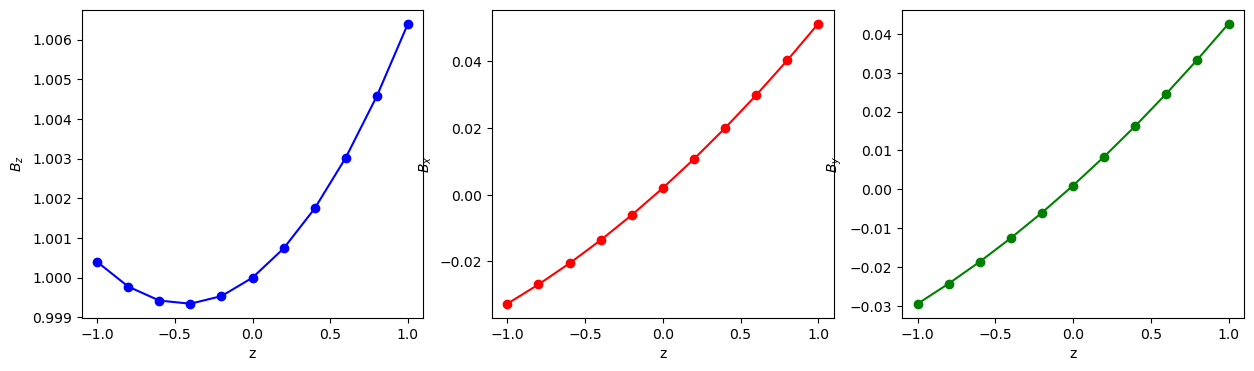

In [10]:
# plot the magnetic field 
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.plot(length,Bz_z,'bo-')
ax1.set_xlabel('z')
ax1.set_ylabel(r'$B_z$')
ax2.plot(length,Bx_z,'ro-')
ax2.set_xlabel('z')
ax2.set_ylabel(r'$B_x$')
ax3.plot(length,By_z,'go-')
ax3.set_xlabel('z')
ax3.set_ylabel(r'$B_y$')

In [22]:
# select B on cube surface (BV)

surface_bool = (xv == -1) + (xv ==1) + (yv == -1) + (yv ==1) + (zv == -1) + (zv ==1)  # mask to select coordinates on the box surface 
BV = B_arr[surface_bool]     # Boundary values 
PBV = B_arr[~surface_bool]   # 
PBV.shape

(729, 3)

In [26]:
# lets test gradient calculation of B
import torch
length = torch.linspace(-1,1,11)
#xv,yv,zv= np.meshgrid(length,length,length)

In [35]:
xv,yv,zv= torch.meshgrid(length,length,length,indexing='ij',rees)

In [37]:
yv

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.8000, -0.8000, -0.8000,  ..., -0.8000, -0.8000, -0.8000],
         [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
         ...,
         [ 0.6000,  0.6000,  0.6000,  ...,  0.6000,  0.6000,  0.6000],
         [ 0.8000,  0.8000,  0.8000,  ...,  0.8000,  0.8000,  0.8000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.8000, -0.8000, -0.8000,  ..., -0.8000, -0.8000, -0.8000],
         [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
         ...,
         [ 0.6000,  0.6000,  0.6000,  ...,  0.6000,  0.6000,  0.6000],
         [ 0.8000,  0.8000,  0.8000,  ...,  0.8000,  0.8000,  0.8000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-0.8000, -0.8000, -0.8000,  ..., -0

In [38]:
zv

tensor([[[-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         ...,
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000]],

        [[-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         ...,
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000]],

        [[-1.0000, -0.8000, -0.6000,  ...,  0.6000,  0.8000,  1.0000],
         [-1.0000, -0.8000, -0.6000,  ...,  0